# Telecom X – Parte 2: Prevendo Churn
## História do Desafio

Parabéns! Você foi promovido após seu excelente desempenho na análise exploratória da evasão de clientes na Telecom X. Sua dedicação, clareza na comunicação dos dados e visão estratégica fizeram a diferença.

Agora, você foi convidado a integrar oficialmente a equipe de Machine Learning da empresa!
### Missão

Sua nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.
### Objetivos do Desafio

-    Preparar os dados para a modelagem (tratamento, encoding, normalização).
-    Realizar análise de correlação e seleção de variáveis.
-    Treinar dois ou mais modelos de classificação.
-    Avaliar o desempenho dos modelos com métricas.
-    Interpretar os resultados, incluindo a importância das variáveis.
-    Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

### O que você vai praticar

- ✅ Pré-processamento de dados para Machine Learning
- ✅ Construção e avaliação de modelos preditivos
- ✅ Interpretação dos resultados e entrega de insights
- ✅ Comunicação técnica com foco estratégico

### Você agora é: Analista de Machine Learning Júnior

A Telecom X está confiando na sua entrega para dar os próximos passos em direção a uma solução de inteligência preditiva eficaz. Boa sorte!

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline


---
## Preparação dos Dados

### Extração do Arquivo Tratado
Carregar o arquivo CSV que contém os dados tratados anteriormente.

In [2]:
df = pd.read_csv('dataset/telecom_x_norm.csv')
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.InternetService,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,No,Female,No,Yes,Yes,9,Yes,DSL,One year,Mailed check,65.6,593.30,2.19
1,No,Male,No,No,No,9,Yes,DSL,Month-to-month,Mailed check,59.9,542.40,2.00
2,Yes,Male,No,No,No,4,Yes,Fiber optic,Month-to-month,Electronic check,73.9,280.85,2.46
3,Yes,Male,Yes,Yes,No,13,Yes,Fiber optic,Month-to-month,Electronic check,98.0,1237.85,3.27
4,Yes,Female,Yes,Yes,No,3,Yes,Fiber optic,Month-to-month,Mailed check,83.9,267.40,2.80


### Remoção de Colunas Irrelevantes
Elimine colunas que não trazem valor para a análise ou para os modelos preditivos, como identificadores únicos (por exemplo, o ID do cliente). Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

In [3]:
df.describe(include='O')

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,phone.PhoneService,internet.InternetService,account.Contract,account.PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,2,3,3,4
top,No,Male,No,No,No,Yes,Fiber optic,Month-to-month,Electronic check
freq,5174,3555,5901,3641,4933,6361,3096,3875,2365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7043 non-null   object 
 1   customer.gender           7043 non-null   object 
 2   customer.SeniorCitizen    7043 non-null   object 
 3   customer.Partner          7043 non-null   object 
 4   customer.Dependents       7043 non-null   object 
 5   customer.tenure           7043 non-null   int64  
 6   phone.PhoneService        7043 non-null   object 
 7   internet.InternetService  7043 non-null   object 
 8   account.Contract          7043 non-null   object 
 9   account.PaymentMethod     7043 non-null   object 
 10  account.Charges.Monthly   7043 non-null   float64
 11  account.Charges.Total     7043 non-null   float64
 12  account.Charges.Daily     7043 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 715.4+ KB


### Encoding
Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o one-hot encoding.

In [5]:
# Tratamento de variáveis categóricas com duas categorias
df['customer.gender'] = df['customer.gender'].map({'Female': 0, 'Male': 1})
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.InternetService,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,No,0,No,Yes,Yes,9,Yes,DSL,One year,Mailed check,65.6,593.30,2.19
1,No,1,No,No,No,9,Yes,DSL,Month-to-month,Mailed check,59.9,542.40,2.00
2,Yes,1,No,No,No,4,Yes,Fiber optic,Month-to-month,Electronic check,73.9,280.85,2.46
3,Yes,1,Yes,Yes,No,13,Yes,Fiber optic,Month-to-month,Electronic check,98.0,1237.85,3.27
4,Yes,0,Yes,Yes,No,3,Yes,Fiber optic,Month-to-month,Mailed check,83.9,267.40,2.80


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7043 non-null   object 
 1   customer.gender           7043 non-null   int64  
 2   customer.SeniorCitizen    7043 non-null   object 
 3   customer.Partner          7043 non-null   object 
 4   customer.Dependents       7043 non-null   object 
 5   customer.tenure           7043 non-null   int64  
 6   phone.PhoneService        7043 non-null   object 
 7   internet.InternetService  7043 non-null   object 
 8   account.Contract          7043 non-null   object 
 9   account.PaymentMethod     7043 non-null   object 
 10  account.Charges.Monthly   7043 non-null   float64
 11  account.Charges.Total     7043 non-null   float64
 12  account.Charges.Daily     7043 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 715.4+ KB


In [7]:
# Seleciona colunas do tipo 'object'
columns_object = [col for col in df.columns if df[col].dtype == 'object']

# Filtra as colunas com exatamente 2 valores únicos
columns_bin = [col for col in columns_object if df[col].nunique(dropna=True) == 2]

columns_bin


['Churn',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService']

In [8]:
# Tratamento de variáveis categóricas com mais de duas categorias
#columns_bin = ['Churn', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService']
df[columns_bin] = df[columns_bin].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.InternetService,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0,0,0,1,1,9,1,DSL,One year,Mailed check,65.6,593.30,2.19
1,0,1,0,0,0,9,1,DSL,Month-to-month,Mailed check,59.9,542.40,2.00
2,1,1,0,0,0,4,1,Fiber optic,Month-to-month,Electronic check,73.9,280.85,2.46
3,1,1,1,1,0,13,1,Fiber optic,Month-to-month,Electronic check,98.0,1237.85,3.27
4,1,0,1,1,0,3,1,Fiber optic,Month-to-month,Mailed check,83.9,267.40,2.80


In [9]:
# verificando as colunas de categorias binarias estão corretas
for col in columns_bin:
    print(f"{col}: {df[col].unique()}")

Churn: [0 1]
customer.SeniorCitizen: [0 1]
customer.Partner: [1 0]
customer.Dependents: [1 0]
phone.PhoneService: [1 0]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7043 non-null   int64  
 1   customer.gender           7043 non-null   int64  
 2   customer.SeniorCitizen    7043 non-null   int64  
 3   customer.Partner          7043 non-null   int64  
 4   customer.Dependents       7043 non-null   int64  
 5   customer.tenure           7043 non-null   int64  
 6   phone.PhoneService        7043 non-null   int64  
 7   internet.InternetService  7043 non-null   object 
 8   account.Contract          7043 non-null   object 
 9   account.PaymentMethod     7043 non-null   object 
 10  account.Charges.Monthly   7043 non-null   float64
 11  account.Charges.Total     7043 non-null   float64
 12  account.Charges.Daily     7043 non-null   float64
dtypes: float64(3), int64(7), object(3)
memory usage: 715.4+ KB


In [11]:
df.nunique()

Churn                          2
customer.gender                2
customer.SeniorCitizen         2
customer.Partner               2
customer.Dependents            2
customer.tenure               73
phone.PhoneService             2
internet.InternetService       3
account.Contract               3
account.PaymentMethod          4
account.Charges.Monthly     1585
account.Charges.Total       6531
account.Charges.Daily        321
dtype: int64

In [12]:
# identificando as colunas com mais de duas categorias
columns_multi = [col for col in df.columns if df[col].dtype == 'object']
columns_multi

['internet.InternetService', 'account.Contract', 'account.PaymentMethod']

In [13]:
df_encoded = pd.get_dummies(data=df, columns=columns_multi, dtype=int)
df_encoded.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,65.6,593.30,2.19,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,59.9,542.40,2.00,1,0,0,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,73.9,280.85,2.46,0,1,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,98.0,1237.85,3.27,0,1,0,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,83.9,267.40,2.80,0,1,0,1,0,0,0,0,0,1


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7043 non-null   int64  
 1   customer.gender                                  7043 non-null   int64  
 2   customer.SeniorCitizen                           7043 non-null   int64  
 3   customer.Partner                                 7043 non-null   int64  
 4   customer.Dependents                              7043 non-null   int64  
 5   customer.tenure                                  7043 non-null   int64  
 6   phone.PhoneService                               7043 non-null   int64  
 7   account.Charges.Monthly                          7043 non-null   float64
 8   account.Charges.Total                            7043 non-null   float64
 9   account.Charges.Daily         

In [15]:
df_encoded.nunique()

Churn                                                 2
customer.gender                                       2
customer.SeniorCitizen                                2
customer.Partner                                      2
customer.Dependents                                   2
customer.tenure                                      73
phone.PhoneService                                    2
account.Charges.Monthly                            1585
account.Charges.Total                              6531
account.Charges.Daily                               321
internet.InternetService_DSL                          2
internet.InternetService_Fiber optic                  2
internet.InternetService_No                           2
account.Contract_Month-to-month                       2
account.Contract_One year                             2
account.Contract_Two year                             2
account.PaymentMethod_Bank transfer (automatic)       2
account.PaymentMethod_Credit card (automatic)   

### Verificação da Proporção de Evasão

Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

In [16]:
print(df_encoded['Churn'].value_counts())
print(df_encoded['Churn'].value_counts(normalize=True))

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


**Interpretação**:

-    73,4% dos clientes permaneceram ativos (Churn = 0)
-    26,6% dos clientes evadiram (Churn = 1)

#### Balanceamento de Classes (opcional)
Caso queira aprofundar a análise, aplique técnicas de balanceamento como undersampling ou oversampling. Em situações de forte desbalanceamento, ferramentas como o SMOTE podem ser úteis para gerar exemplos sintéticos da classe minoritária.

Analisar se o dataset está balanceado ou desbalanceado quanto ao número de clientes que evadiram (churn = 1) e os que permaneceram (churn = 0).

Isso é essencial porque:

- Se houver poucos casos de evasão, análises e modelos de ML podem ser enviesados.
- Um dataset desbalanceado exige estratégias específicas (ex: oversampling, métricas adequadas).

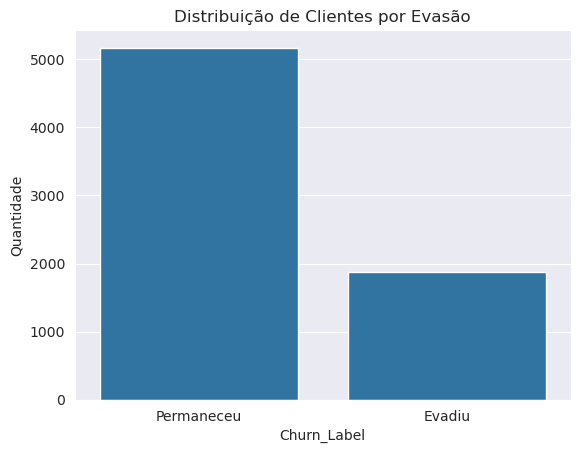

In [17]:
df_encoded['Churn_Label'] = df_encoded['Churn'].map({0: 'Permaneceu', 1: 'Evadiu'})

sns.countplot(x='Churn_Label', data=df_encoded)
plt.title('Distribuição de Clientes por Evasão')
plt.ylabel('Quantidade')
plt.show()


**Avaliação de equilíbrio entre as classes**

Essa proporção indica que o conjunto de dados está **desbalanceado**, pois a classe `evadiu` representa menos de 30% dos registros.

Conclusão

-     Sim, é necessário aplicar técnicas de balanceamento dado o desnível de ~73/27.
-     O SMOTE é uma das melhores opções por gerar amostras sintéticas mais informativas.
-     Idealmente, será aplicado balanceamento apenas nos dados de treino, preservando a distribuição original no teste para uma avaliação realista.


In [23]:
# para evitar data leakage no balanceamento pois este campo no X tem correlação direta com Churn
df_encoded =df_encoded.drop('Churn_Label', axis=1)
df_encoded.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,65.6,593.30,2.19,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,59.9,542.40,2.00,1,0,0,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,73.9,280.85,2.46,0,1,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,98.0,1237.85,3.27,0,1,0,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,83.9,267.40,2.80,0,1,0,1,0,0,0,0,0,1


In [25]:
# 1. Separar X (features) e y (target)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 2. Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)
# 3. Dividir em treino/teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 4. Criar pipeline com SMOTE + Classificador
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

# 5. Treinar modelo com dados balanceados (SMOTE)
pipeline.fit(X_train, y_train)

# 6. Avaliar modelo
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# 7. Métricas
print(" Classification Report:")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n AUC Score:")
print(roc_auc_score(y_test, y_proba))


 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1552
           1       0.57      0.56      0.57       561

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113


 Confusion Matrix:
[[1313  239]
 [ 246  315]]

 AUC Score:
0.805716733741294


**Interpretação Atualizada**
|Classe	        | Precisão	| Recall	| F1-score	| Suporte
|---|---|---|---|---
|0 (retenção)	| 0.84	    | 0.85	    |0.84	    | 1552
|1 (evasão)	    | 0.57	    | 0.56	    | 0.57	    | 561

-    Acurácia geral: 77%
-    F1-score da classe 1 (evasão): 0.57
-    AUC: 0.81 → bom poder discriminativo

**Conclusões**

- O modelo não está superestimando a performance.
- Ele ainda está desequilibrado nas classes, especialmente com pior performance para detectar quem irá evadir (classe 1).
_ Isso é esperado em datasets desbalanceados, mesmo após aplicação do SMOTE. (SMOTE tenta equilibrar, mas não resolve tudo sozinho.)

### Normalização ou Padronização (se necessário)
Avalie a necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.
Modelos baseados em distância, como KNN, SVM, Regressão Logística e Redes Neurais, requerem esse pré-processamento.
Já modelos baseados em árvore, como Decision Tree, Random Forest e XGBoost, não são sensíveis à escala dos dados.

In [ ]:
# já realizado anteriormente

---
## Correlação e Seleção de Variáveis

### Análise de Correlação

Visualize a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

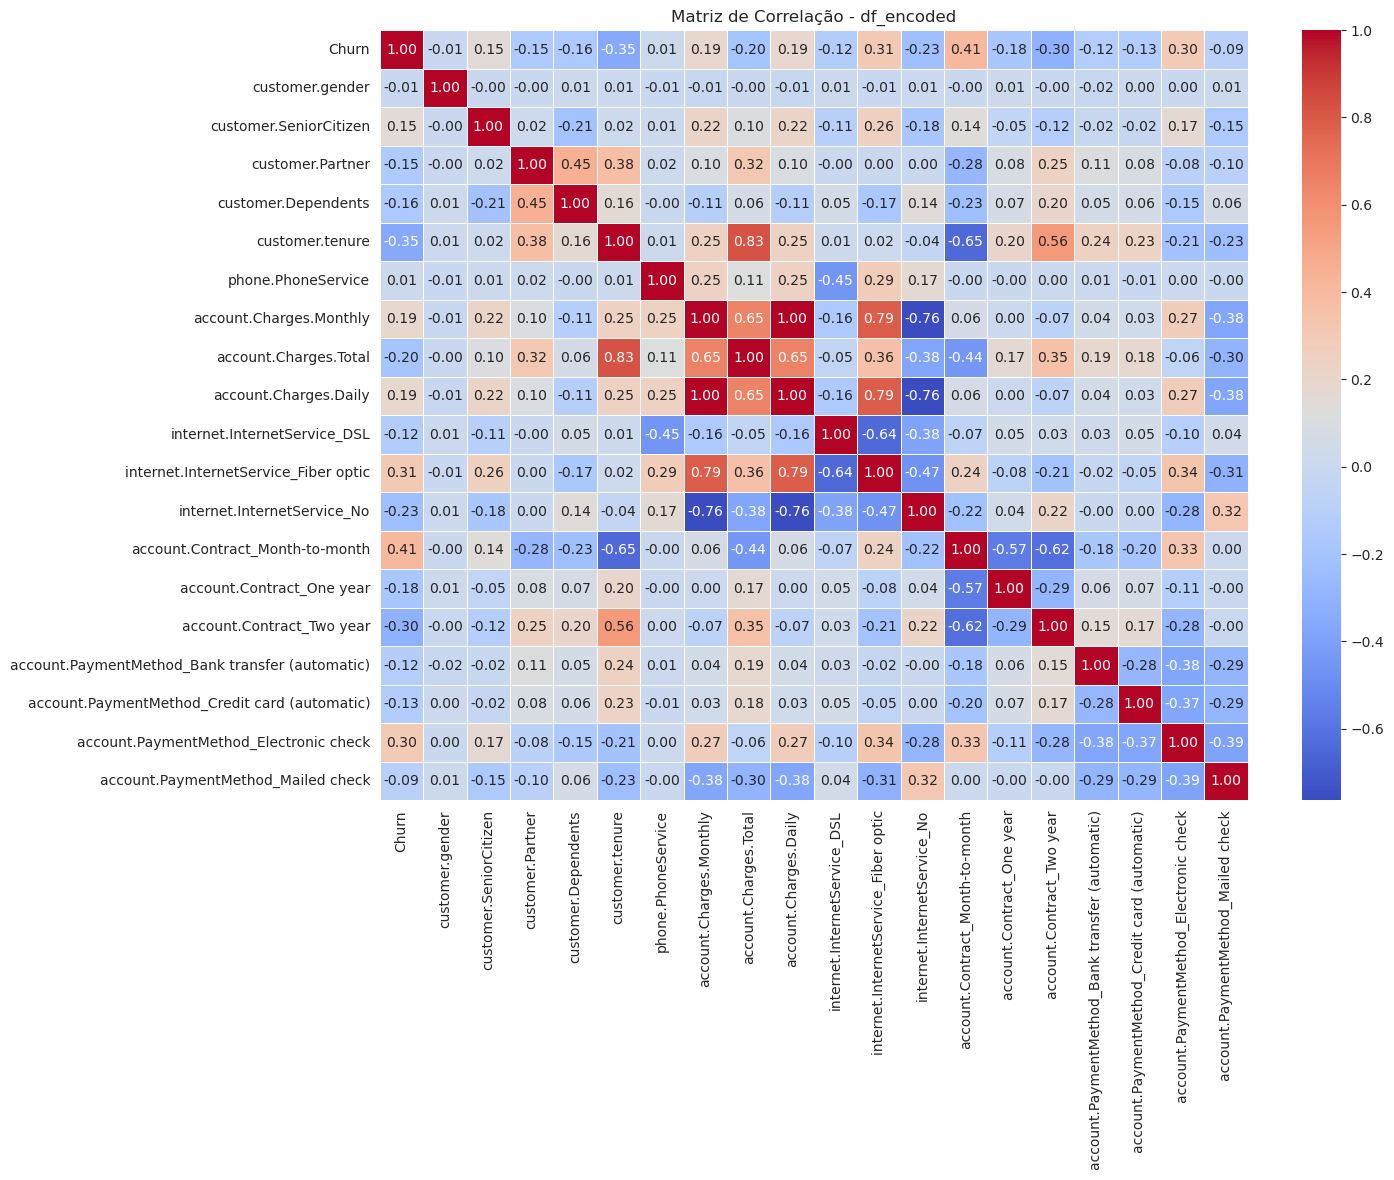

Correlação com 'Churn':
account.Contract_Month-to-month                    0.405103
internet.InternetService_Fiber optic               0.308020
account.PaymentMethod_Electronic check             0.301919
account.Charges.Daily                              0.193412
account.Charges.Monthly                            0.193356
customer.SeniorCitizen                             0.150889
phone.PhoneService                                 0.011942
customer.gender                                   -0.008612
account.PaymentMethod_Mailed check                -0.091683
account.PaymentMethod_Bank transfer (automatic)   -0.117937
internet.InternetService_DSL                      -0.124214
account.PaymentMethod_Credit card (automatic)     -0.134302
customer.Partner                                  -0.150448
customer.Dependents                               -0.164221
account.Contract_One year                         -0.177820
account.Charges.Total                             -0.198324
internet.Interne

In [26]:
# Gerar a matriz de correlação com foco em Churn
# Calcula a matriz de correlação
corr_matrix = df_encoded.corr()

# Exibe a matriz de correlação como um heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação - df_encoded")
plt.show()

# Correlação com a variável Churn (ordenada por relevância)
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)
print("Correlação com 'Churn':")
print(churn_corr)


**Variáveis com Maior Correlação Positiva com Churn (evasão)**:

Essas variáveis *aumentam a probabilidade de evasão*:

| Variável	                             | Correlação	| Interpretação
|---|---|---
|account.Contract_Month-to-month	     | +0.41	    | Clientes com contrato mensal têm maior tendência a evadir.
|internet.InternetService_Fiber optic	 | +0.31	    | Clientes com fibra óptica tendem a evadir mais que os de DSL ou sem internet.
|account.PaymentMethod_Electronic check	 | +0.30	    | Pagamento via boleto eletrônico está associado a maior evasão.
|account.Charges.Daily / Monthly	     | +0.19	    | Cobranças mais altas por dia ou mês se correlacionam levemente com evasão.
|customer.SeniorCitizen	                 | +0.15	    | Cidadãos seniores (idosos) evadem mais.

**Variáveis com Correlação Negativa com Churn**:

Essas variáveis estão associadas à *retenção* (permanência):

| Variável	                    | Correlação	| Interpretação
|---|---|---
| customer.tenure	            | −0.35	        | Clientes mais antigos tendem a ficar.
| account.Contract_Two year	    | −0.30	        | Contrato de dois anos indica maior lealdade.
| internet.InternetService_No	| −0.23	        | Quem não possui serviço de internet tem menor evasão (curioso, mas pode indicar perfil diferente).
| account.Charges.Total	        | −0.20	        | Cobranças totais maiores associadas à permanência (clientes antigos).
| customer.Dependents	        | −0.16	        | Quem tem dependentes tende a permanecer.
| customer.Partner	            | −0.15	        | Ter parceiro(a) se associa à retenção.

Variáveis *pouco correlacionadas*:

-    customer.gender → quase nula (-0.008) → pode ser descartada ou ficar como informação complementar.
-    phone.PhoneService → muito baixa (0.01) → pouco informativa isoladamente.

### Análises Direcionadas
Investigue como variáveis específicas se relacionam com a evasão, como:

- Tempo de contrato × Evasão

- Total gasto × Evasão

Utilize gráficos como boxplots ou dispersão (scatter plots) para visualizar padrões e possíveis tendências.

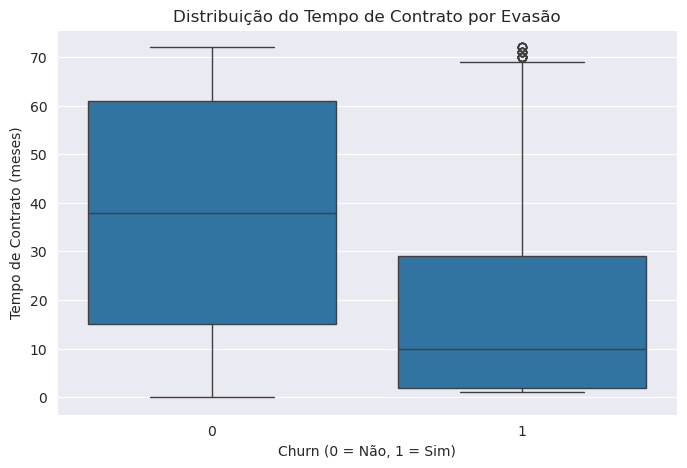

In [28]:
# Boxplot: Tempo de contrato × Evasão
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer.tenure', data=df_encoded)
plt.title('Distribuição do Tempo de Contrato por Evasão')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()


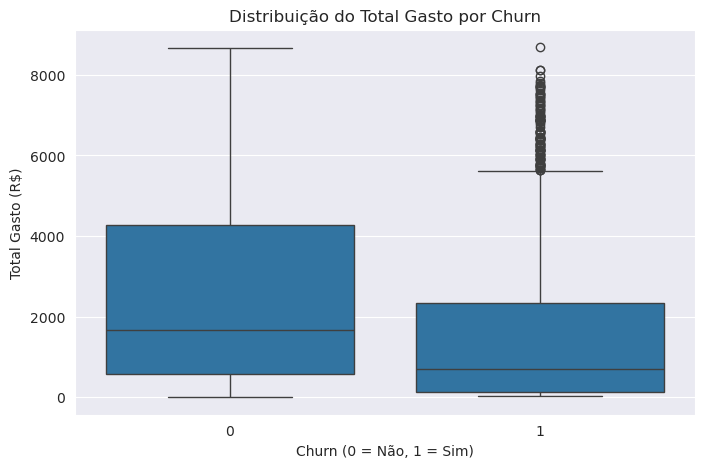

In [30]:
# Boxplot: Total gasto × Evasão
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_encoded)
plt.title('Distribuição do Total Gasto por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Total Gasto (R$)')
plt.show()


 #### Boxplot - Total Gasto × Evasão

Análise:

-    Clientes que não evadiram (Churn = 0) possuem, em média, um gasto total significativamente maior.
-    Clientes que evadiram (Churn = 1) concentram-se nos valores mais baixos de gasto, com muitos outliers negativos.

Sugestões de Ação:

-    Monitorar clientes de baixo gasto: podem estar em risco de evasão.
-    Oferecer programas de engajamento ou fidelidade para aumentar o uso dos serviços.
-    Implementar campanhas de retenção para quem está abaixo de uma faixa crítica de gasto.

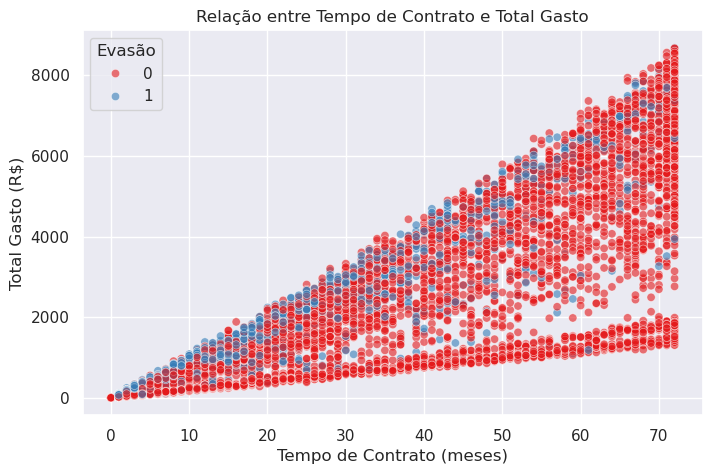

In [39]:
# Scatter Plot: Tempo de contrato × Total gasto (colorido por churn)
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='customer.tenure',
    y='account.Charges.Total',
    hue='Churn',
    palette='Set1',
    data=df_encoded,
    alpha=0.6
)
plt.title('Relação entre Tempo de Contrato e Total Gasto')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Evasão',)
plt.show()


### Scatter Plot - Tempo de Contrato × Total Gasto × Evasão

Análise:

-    Existe uma relação linear clara entre tempo de contrato e total gasto.
-    A evasão é mais comum nos primeiros meses de contrato, antes que o cliente gere um alto valor.

Sugestões de Ação:

-    Criar estratégias de boas-vindas eficazes nos primeiros meses de contrato.
-    Oferecer benefícios de permanência progressiva, como bônus crescentes com o tempo.
-    Desenvolver um sistema de alerta precoce para sinais de baixa interação logo nos primeiros meses.

### Conclusão Estratégica

A evasão de clientes está concentrada em usuários com baixo tempo de contrato e baixo gasto total. Isso indica que o período inicial é crítico e exige ações direcionadas. A empresa deve:

-    Identificar clientes com baixo engajamento inicial.
-    Aplicar ações proativas e personalizadas nas primeiras semanas.
-    Utilizar modelos preditivos com variáveis-chave (tenure, total gasto) para prever churn com antecedência.

---
## Modelagem Preditiva

### Separação de Dados

Divida o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.


In [ ]:
# Já realizado no balanceamento de classes



### Criação de Modelos
Crie pelo menos dois modelos diferentes para prever a evasão de clientes.

    Um modelo pode exigir normalização, como Regressão Logística ou KNN.

    O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

    💡 A escolha de aplicar ou não a normalização depende dos modelos selecionados. Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.

Justifique a escolha de cada modelo e, se optar por normalizar os dados, explique a necessidade dessa etapa.

In [42]:
# Modelo 1: Regressão Logística (com normalização)
pipeline_logreg = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

**Modelo 1**: Regressão Logística (com normalização)
Justificativa:

-    A Regressão Logística é um modelo linear e sensível à escala das variáveis.
-    Requer normalização (ou padronização) para garantir que variáveis com maior magnitude não dominem o modelo.
-    Útil como modelo base (benchmark) por ser interpretável.

Pipeline:

-    Normalização com StandardScaler
-    Balanceamento com SMOTE
-    Classificação com LogisticRegression

In [43]:
# Modelo 2: Random Forest (sem normalização)
pipeline_rf = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

**Modelo 2**: Random Forest (sem normalização)
Justificativa:

-    Árvores de decisão e Random Forest não exigem normalização porque são baseadas em divisões binárias (e não em distância).
-    São modelos não lineares, robustos e com boa performance mesmo com variáveis categóricas codificadas.
-    Boa escolha para capturar interações complexas entre variáveis.

In [44]:
# Treinar modelos
pipeline_logreg.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

# Previsões
y_pred_logreg = pipeline_logreg.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

# Avaliação
print("Modelo: Regressão Logística")
print(classification_report(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, pipeline_logreg.predict_proba(X_test)[:, 1]))

print("\nModelo: Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, pipeline_rf.predict_proba(X_test)[:, 1]))

Modelo: Regressão Logística
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1552
           1       0.50      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113

ROC AUC: 0.8336049626035983

Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1552
           1       0.57      0.56      0.57       561

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113

ROC AUC: 0.805716733741294


---
### Avaliação dos Modelos

Avalie cada modelo utilizando as seguintes métricas:

-    Acurácia
-    Precisão
-    Recall
-    F1-score
-    Matriz de confusão

Em seguida, faça uma análise crítica e compare os modelos:

-   Qual modelo teve o melhor desempenho?
-   Algum modelo apresentou overfitting ou underfitting? Se sim, considere as possíveis causas e ajustes:
-   Overfitting: Quando o modelo aprende demais sobre os dados de treino, perdendo a capacidade de generalizar para novos dados. Considere reduzir a complexidade do modelo ou aumentar os dados de treino.
-   Underfitting: Quando o modelo não captura bem as tendências dos dados, indicando que está muito simples. Tente aumentar a complexidade do modelo ou ajustar seus parâmetros.

### Métricas por Modelo
#### Regressão Logística

| Métrica      | Classe 0 (Não Evasão) | Classe 1 (Evasão) |
| ------------ | --------------------- | ----------------- |
| Precisão     | 0.91                  | 0.50              |
| Recall       | 0.71                  | **0.80**          |
| F1-score     | 0.80                  | 0.62              |
| **Acurácia** | **0.74**              | —                 |
| **ROC AUC**  | **0.83**              | —                 |


#### Random Forest

| Métrica      | Classe 0 (Não Evasão) | Classe 1 (Evasão) |
| ------------ | --------------------- | ----------------- |
| Precisão     | 0.84                  | 0.57              |
| Recall       | 0.85                  | 0.56              |
| F1-score     | 0.84                  | 0.57              |
| **Acurácia** | **0.77**              | —                 |
| **ROC AUC**  | 0.81                  | —                 |


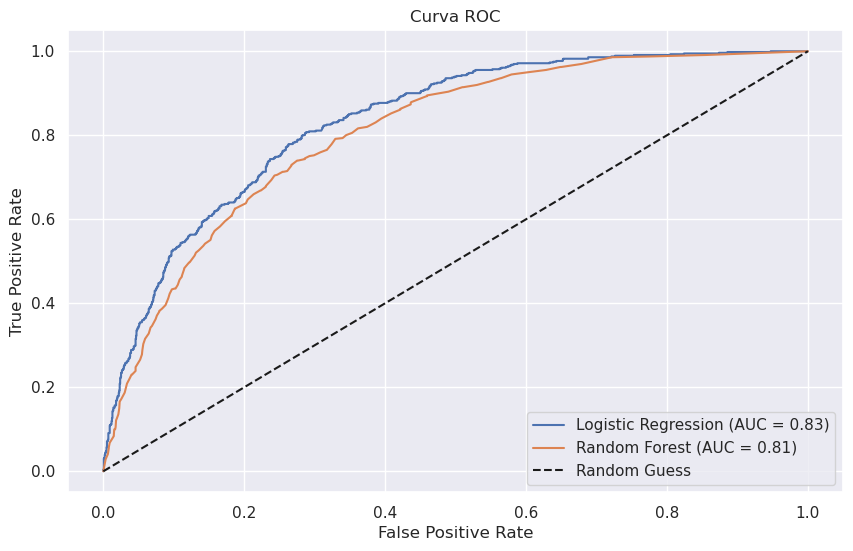

In [46]:
# Previsões de probabilidade para curva ROC
y_proba_logreg = pipeline_logreg.predict_proba(X_test)[:, 1]
y_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]


# --- CURVA ROC ---
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_logreg):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()




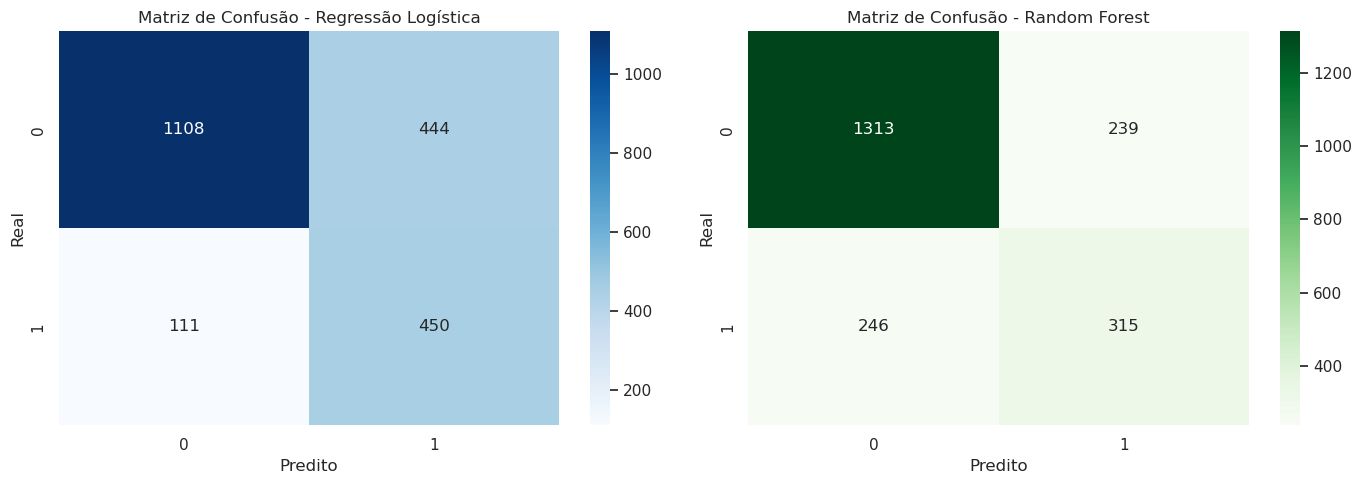

In [47]:
# --- MATRIZ DE CONFUSÃO ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LogReg
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Regressão Logística')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Random Forest')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

### Análise da Matriz de Confusão
**Regressão Logística**
	   Predito 0	Predito 1
Real 0	1108	     444
Real 1	111	         450

-   Verdadeiros Positivos (VP): 450 (clientes que evadiram corretamente identificados)
-   Falsos Negativos (FN): 111 (clientes que evadiram, mas foram classificados como não)
-   Falsos Positivos (FP): 444 (clientes que não evadiram, mas o modelo achou que sim)
-   Verdadeiros Negativos (VN): 1108

> O modelo tem um recall alto para classe 1 (evasão), o que é bom quando queremos minimizar evasões não detectadas, mesmo com mais falsos positivos.

### Análise Crítica
#### Desempenho Geral

| Métrica      | Regressão Logística | Random Forest | Melhor |
| ------------ | ------------------- | ------------- | ------ |
| Acurácia     | 0.74                | **0.77**      | RF     |
| Precisão (1) | 0.50                | **0.57**      | RF     |
| Recall (1)   | **0.80**            | 0.56          | RL     |
| F1-score (1) | **0.62**            | 0.57          | RL     |
| ROC AUC      | **0.83**            | 0.81          | RL     |

-    A *Regressão Logística* (RL) teve melhor recall, f1-score e ROC AUC.
-    A *Random Forest* (RF) teve melhor acurácia e precisão, mas perdeu mais churners reais.

**Resumo**:

-    Se o foco é reduzir churn → Regressão Logística é preferida (maior recall).
-    Se o foco é precisão operacional (evitar falsos positivos) → Random Forest é mais equilibrada.

#### Overfitting ou Underfitting?
**Regressão Logística**

-    Resultados equilibrados e generalizáveis.
-    Não há indícios claros de overfitting ou underfitting.
-    Pode melhorar com seleção de variáveis e ajuste de thresholds.

**Random Forest**

-    Ligeira tendência a overfitting:
- -   Muito bom em treinar (alta acurácia em classe 0), mas perde recall na classe 1.
-    Pode ser ajustado com:
- -        Redução de profundidade da árvore (max_depth)
- -        Redução de número de árvores (n_estimators)
- -        Uso de validação cruzada

**Recomendações Finais**

**Modelo preferido**: *Reg Logística* (melhor recall e f1 para churn).


## Interpretação e Conclusões

### Análise de Importância das Variáveis

Após escolher os modelos, realize a análise das variáveis mais relevantes para a previsão de evasão:

-    Regressão Logística:  investigue os coeficientes das variáveis, que mostram sua contribuição para a previsão de evasão.
-    KNN (K-Nearest Neighbors): Observe como os vizinhos mais próximos influenciam a decisão de classificação. As variáveis mais impactantes podem ser aquelas que mais contribuem para a proximidade entre os pontos de dados.
-    Random Forest: Utilize a importância das variáveis fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores.
-    SVM (Support Vector Machine): No SVM, as variáveis mais relevantes são aquelas que influenciam a fronteira de decisão entre as classes. Você pode analisar os coeficientes dos vetores de suporte para entender quais variáveis têm maior impacto.
-    Outros Modelos: Dependendo do modelo escolhido, considere a análise de métricas específicas para entender a relevância das variáveis. Por exemplo, coeficientes em modelos lineares, pesos em redes neurais, ou importância relativa em boosting (como XGBoost).

In [49]:
print(pipeline_logreg.named_steps)


{'scaler': StandardScaler(), 'smote': SMOTE(random_state=42), 'clf': LogisticRegression(max_iter=1000, random_state=42)}


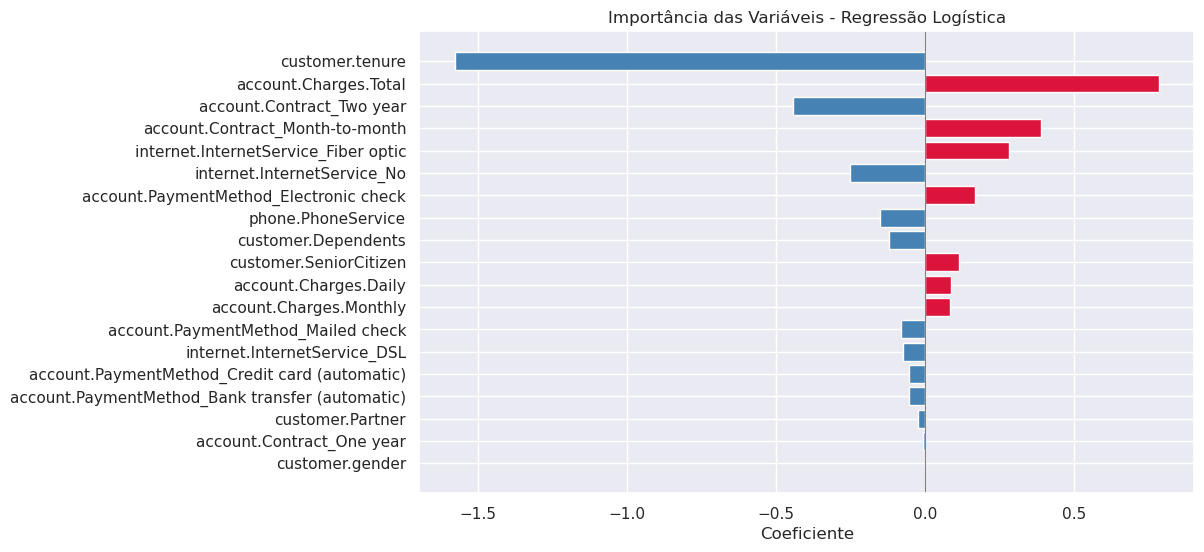

In [50]:
# Extrair os coeficientes do modelo
feature_names = X_train.columns
coef_logreg = pipeline_logreg.named_steps['clf'].coef_[0]

# Criar DataFrame
coef_df = pd.DataFrame({'Variável': feature_names, 'Coeficiente': coef_logreg})
coef_df['Impacto'] = coef_df['Coeficiente'].apply(lambda x: 'Aumenta evasão' if x > 0 else 'Reduz evasão')

# Ordenar pela magnitude do coeficiente
coef_df['|Coef|'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='|Coef|', ascending=False).drop(columns='|Coef|')

# Exibir
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Variável'], coef_df['Coeficiente'], color=['crimson' if x > 0 else 'steelblue' for x in coef_df['Coeficiente']])
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlabel('Coeficiente')
plt.title('Importância das Variáveis - Regressão Logística')
plt.gca().invert_yaxis()
plt.show()

# Também exibir tabela se necessário
#import caas_jupyter_tools as cjtools
#cjtools.display_dataframe_to_user(name="Coeficientes - Regressão Logística", dataframe=coef_df)


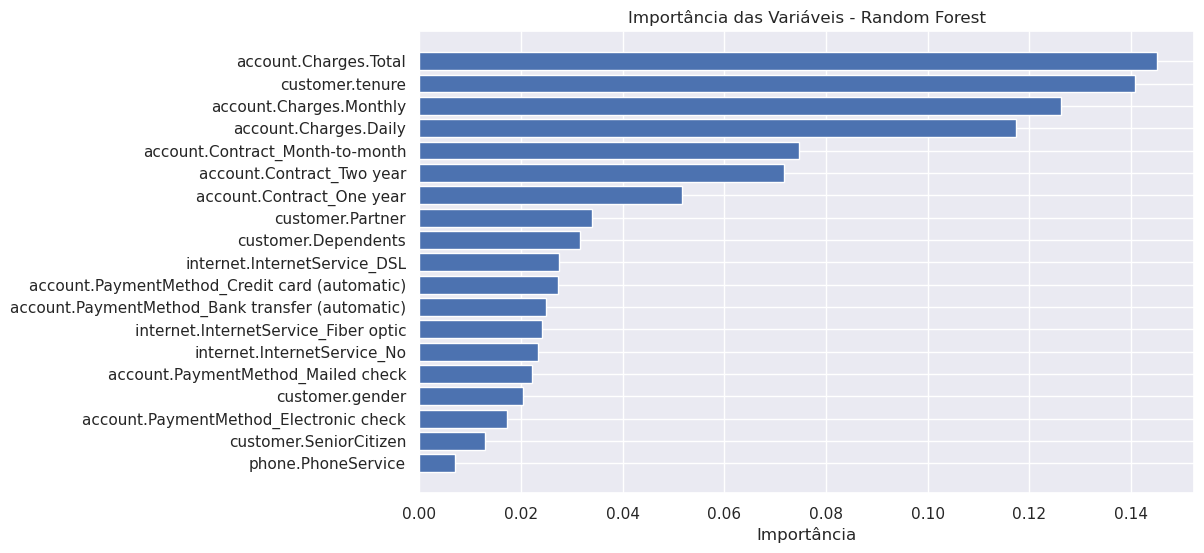

In [53]:
# Extrair importâncias
importances_rf = pipeline_rf.named_steps['clf'].feature_importances_

# Criar DataFrame
importance_df = pd.DataFrame({'Variável': feature_names, 'Importância': importances_rf})
importance_df = importance_df.sort_values(by='Importância', ascending=False)

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variável'], importance_df['Importância'])
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.gca().invert_yaxis()
plt.show()



#### 1. Regressão Linear

-    **Modelo linear e interpretável**, onde os coeficientes indicam a direção e magnitude da influência de cada variável.

-    *Variáveis mais influentes* (positiva ou negativamente) foram:

- - `account.Charges.Total` e `customer.tenure`: quanto maiores, menor chance de evasão (coeficientes negativos).
- - `account.Contract_Month-to-month`: grande impacto positivo na evasão (coeficiente positivo).
- - `account.Contract_Two year` e `account.Contract_One year`: coeficientes negativos, ou seja, contratos longos ajudam a reter clientes.

>  **Ponto forte**: fácil interpretar o sinal e peso de cada variável.

#### 2. Random Forest

-   **Modelo de árvore de decisão**, que captura relações não lineares e interações entre variáveis.

-   *As variáveis com maior importância relativa* foram:

- - `account.Charges.Total`, `customer.tenure`, `account.Charges.Monthly` e `account.Charges.Daily`.
- - `account.Contract_Month-to-month` e `account.Contract_Two year` também foram muito relevantes.
- Variáveis como `PaymentMethod`, `InternetService`, `SeniorCitizen` tiveram baixa importância.

> **Ponto forte**: captura padrões complexos e interações, mesmo que menos interpretável que a regressão.

#### Comparativo e Conclusão

| Aspecto                     | Regressão Linear                  | Random Forest                            |
| --------------------------- | --------------------------------- | ---------------------------------------- |
| **Tipo de relação**         | Linear                            | Não linear, com interações               |
| **Variáveis-chave**         | Charges, tenure, tipo de contrato | Charges, tenure, tipo de contrato        |
| **Interpretação direta**    | Alta (coeficientes com sinal)     | Média (importância relativa sem sinal)   |
| **Melhor para insights**    | Regressão Linear                  | Random Forest para performance preditiva |
| **Melhor para performance** | Geralmente Random Forest          | Depende do cenário                       |


---
### Conclusão

Elaborem um relatório detalhado, destacando os fatores que mais influenciam a evasão, com base nas variáveis selecionadas e no desempenho de cada modelo.

-    Identifiquem os principais fatores que afetam a evasão de clientes e proponham estratégias de retenção com base nos resultados obtidos.

---
## Relatório Final: Análise de Evasão de Clientes
### Objetivo

O objetivo deste estudo foi identificar os principais fatores que influenciam a evasão de clientes e desenvolver modelos preditivos capazes de antecipar comportamentos de saída, visando subsidiar ações estratégicas de retenção.
#### Modelos Avaliados

Foram comparados dois modelos preditivos:

- Regressão Logística
- Random Forest

> Ambos os modelos foram treinados com dados balanceados por SMOTE e avaliados com base em métricas de classificação e interpretação das variáveis mais influentes.

#### Desempenho Geral
| Métrica      | Regressão Logística | Random Forest | Melhor |
| ------------ | ------------------- | ------------- | ------ |
| Acurácia     | 0.74                | **0.77**      | RF     |
| Precisão (1) | 0.50                | **0.57**      | RF     |
| Recall (1)   | **0.80**            | 0.56          | RL     |
| F1-score (1) | **0.62**            | 0.57          | RL     |
| ROC AUC      | **0.83**            | 0.81          | RL     |


-    **Random Forest** obteve melhor desempenho em termos de *acurácia* e *precisão*, sugerindo maior robustez para identificar corretamente clientes que vão permanecer.
-    A **Regressão Logística** teve melhor desempenho em *recall*, *F01-score* e *ROC AUC*, indicando maior sensibilidade na identificação dos clientes que realmente vão evadir, o que é crítico para estratégias de retenção.

#### Fatores que mais influenciam a evasão

A análise das variáveis mais relevantes mostrou forte concordância entre os modelos:

**Regressão Logística** – Coeficientes

- `account.Charges.Total` e `customer.tenure`: quanto maiores, menor a probabilidade de evasão.
- `account.Contract_Month-to-month`: variável com maior associação positiva com a evasão, ou seja, clientes com contrato mensal tendem a sair mais.
- Contratos *anuais* ou *bienais* (como `Contract_One year` e `Contract_Two year`) foram associados a menor evasão.

**Random Forest** – Importância das Variáveis

Confirma a importância de:

- Gastos financeiros (`Charges.Total`, `Charges.Monthly`, `Charges.Daily`)
- Tempo de permanência (`tenure`)
- Tipo de contrato



### Conclusão Final

#### Conclusão Técnica

A análise comparativa entre Regressão Logística e Random Forest mostrou que ambos os modelos possuem pontos fortes distintos:

-    **Random Forest**:

1. Teve melhor acurácia (0.77) e precisão (0.57), sendo mais robusto na predição geral.
2. Ideal para cenários com dados complexos e onde a performance bruta é priorizada.
3. Útil para análises exploratórias, com bom desempenho mesmo sem grandes ajustes manuais.

-    **Regressão Logística**:

1. Apresentou maior recall (0.80) e F1-score (0.62), superando na capacidade de identificar corretamente os clientes que realmente evadem.
2. Mais interpretável, permitindo compreender com clareza os fatores que influenciam a evasão.
3. Recomendado quando a prioridade é explicabilidade e sensibilidade, como no caso de estratégias de retenção direcionadas.

#### Resumo da melhor aplicação por modelo:
| Objetivo do Negócio                                | Modelo Recomendado  |
| -------------------------------------------------- | ------------------- |
| Detectar o maior número de clientes que evadem     | Regressão Logística |
| Equilibrar performance geral e robustez            | Random Forest       |
| Explicar decisões com base em variáveis preditoras | Regressão Logística |

#### Conclusão Estratégica

A análise dos dados e a importância das variáveis revelam que clientes com menor tempo de contrato e menor valor total gasto estão significativamente mais propensos a evadir. Esse comportamento destaca a fase inicial da jornada do cliente como um período crítico para retenção.

**Principais Fatores de Evasão**:

- 1.    Contrato mensal (menor comprometimento).
- 2.    Baixo tempo de permanência (tenure curto).
- 3.    Faturas mensais e gasto total acumulado baixos.

**Estratégias Recomendadas para Combate à Evasão**:

1. Incentivar contratos mais longos:
 - Oferecer benefícios exclusivos, como descontos progressivos ou bônus, para contratos anuais ou bienais.
2. Atuação proativa nos primeiros meses:
 - Desenvolver campanhas de onboarding e engajamento inicial com suporte personalizado e conteúdos de valor.
 - Criar alertas para clientes com baixo uso nos primeiros 60 dias.
3. Monitoramento de clientes com baixa fatura mensal:
 - Identificar se estão subutilizando serviços ou não percebem valor.
 - Oferecer upgrades personalizados ou conteúdos educativos sobre os serviços contratados.
4. Campanhas de fidelização baseadas em dados:
 - Utilizar o modelo preditivo para antecipar churn e acionar estratégias específicas por perfil de risco.
 - Basear campanhas nos comportamentos dos clientes mais fiéis (benchmark de sucesso).

### Insight Final

A Regressão Logística se destaca como a melhor escolha para antecipar evasões com precisão e transparência, sendo ideal para embasar ações estratégicas de retenção. O Random Forest complementa com sua robustez, sendo útil para tarefas automatizadas e diagnósticos com muitos atributos.

Combinar as forças dos dois modelos em um sistema híbrido pode ampliar a assertividade das estratégias e maximizar os resultados de fidelização.